### Medical cost -> Insurance Prediction using Neural Network Regression

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
df = pd.read_csv('/content/insurance.csv')
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df.shape

(1338, 7)

In [8]:
df1= pd.get_dummies(df)
df1.head(5)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [9]:
y = df1['charges']
y.head(2)

0    16884.9240
1     1725.5523
Name: charges, dtype: float64

In [10]:
x = df1.drop('charges', axis = 1)
x.head(2)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,1,0,0,1,0,0,0,1
1,18,33.77,1,0,1,1,0,0,0,1,0


In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [12]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 11)
(268, 11)
(1070,)
(268,)


In [13]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

model.fit(tf.expand_dims(x_train, axis = -1), y_train, epochs = 100, verbose = 0)

In [14]:
model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8914.7666 - mae: 8914.7666


[8914.7666015625, 8914.7666015625]

In [15]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

In [24]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

history = model_2.fit(tf.expand_dims(x_train, axis = -1), y_train, epochs = 200, verbose = 0)

In [25]:
model_2.evaluate(x_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8632.4014 - mae: 8632.4014


[8632.4013671875, 8632.4013671875]

Text(0.5, 0, 'epochs')

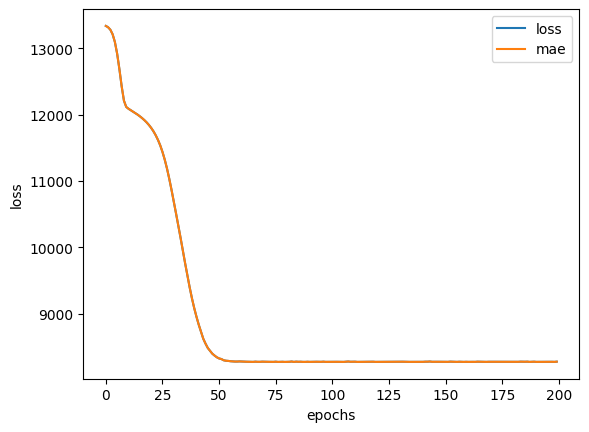

In [26]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Pre-processing data (Normalisation and Standardization)

#### Neural networks tend to prefer normalisation

<Axes: >

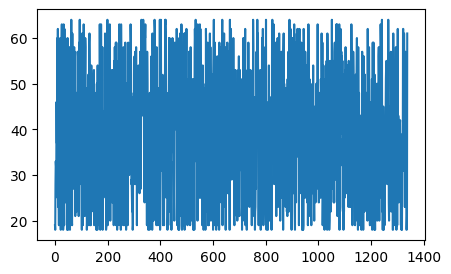

In [30]:
x["age"].plot(figsize = (5, 3))

<Axes: ylabel='Frequency'>

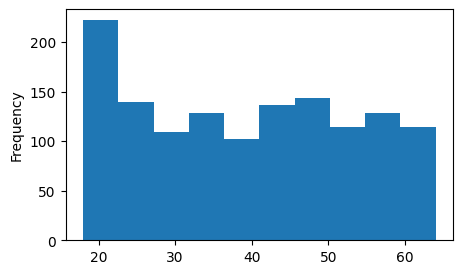

In [34]:
x["age"].plot(kind = "hist", figsize = (5, 3))

<Axes: ylabel='Frequency'>

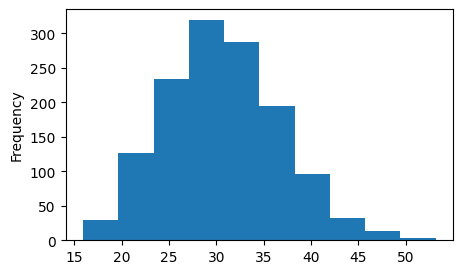

In [35]:
x["bmi"].plot(kind = "hist", figsize = (5, 3))

In [36]:
x["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [37]:
df_new = pd.read_csv('/content/insurance.csv')
df_new.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [39]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder
from sklearn.model_selection import train_test_split

In [41]:
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker", "region"])
)

x = df_new.drop("charges", axis = 1)
y = df_new["charges"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

ct.fit(x_train)

x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [42]:
x_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [44]:
x_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [45]:
x_train.shape, x_train_normal.shape

((1070, 6), (1070, 11))

### Building a neural network to fit normalised data

In [56]:
tf.random.set_seed(42)

model_new = tf.keras.Sequential([
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_new.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

history = model_new.fit(tf.expand_dims(x_train_normal, axis = -1), y_train, epochs = 300, verbose = 0)

In [57]:
model_new.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 8ms/step - loss: 8611.6328 - mae: 8611.6328


[8611.6328125, 8611.6328125]